# Classification par plus proches voisins

In [1]:
import numpy as np

def dist2(a,b):
    d = (np.array(a) - np.array(b))**2
    d = sum(d)
    return np.sqrt(d)

In [2]:
from operator import itemgetter

def knn_index(z,data,k,dist):
    n,d = data.shape
    sorted_index = np.zeros((n,2))
    
    for i in range(n):
        sorted_index[i] = i,dist(z,data[i])
    
    sorted_index = sorted(sorted_index,key=itemgetter(1))
    sorted_index = np.array(sorted_index)[:,0]
    
    return sorted_index[0:k].astype(int)

def classify_kNN(z,data,labels,k,dist):
    
    knn_ind = knn_index(z,data,k,dist)
    label_knn,label_occ = np.unique(labels[knn_ind],return_counts=True)        
    
    if (len(label_knn) > 1):
        knn_ind = knn_index(z,data,k+1,dist)
        label_knn,label_occ = np.unique(labels[knn_ind],return_counts=True)        

    label_knn = label_knn[label_occ==max(label_occ)]
        
    return label_knn.astype(int)

In [3]:
import matplotlib.pyplot as plt

def plot_knn(z,data,k,dist,couleur='black'):
    ind_knn = knn_index(z,data,k,dist)
    kNN = data[ind_knn]
    plt.scatter(kNN[:,0],kNN[:,1],color=couleur,marker='x',label='kNN')    

# Comparaison avec le perceptron

Generer un echantillon gaussien avec ses labels

In [4]:
def gaussian_samples(n,N=2,scale=2,show=False):
    
    if N>4 or N<2:
        print("N must be in [2,4]")
        return False
    
    V = [[1,1],[-1,1],[1,-1],[-1,-1]]
    colors = ['red','green','yellow','pink']
    
    data=np.random.randn(n,2) + np.array(V[0]) * scale
    labels=np.zeros(n)
    if show:
        plt.scatter(data[:,0],data[:,1],color=colors[0], label='classe 0')
    
    for i in np.arange(1,N):
        data1 = np.random.randn(n,2) + np.array(V[i]) * scale
        labels1 = np.ones(n) * i
        data = np.concatenate([data,np.array(data1)])
        labels = np.concatenate([labels,labels1])
        if show:
            plt.scatter(data1[:,0],data1[:,1],color=colors[i], label='classe '+str(i))
            
    return data,labels

on utilise la library perceptron du tp2

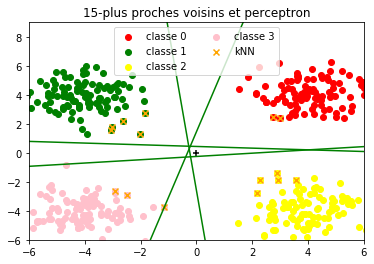

In [11]:
import perceptron
from display import gaussian_samples

z, n_neighbours = [0,0], 15
data_gaussian,labels_gaussian = gaussian_samples(100,N=4,scale=4,show=True)

plot_knn(z,data_gaussian,n_neighbours,dist2,couleur='orange')
perceptron.plot_multiperceptron(data_gaussian,labels_gaussian)
plt.scatter(z[0],z[1], marker="+",color='black')

plt.xlim(-6,6)
plt.ylim(-6,9)
plt.title(str(n_neighbours) + '-plus proches voisins et perceptron')
plt.legend(loc="upper center",ncol=2)
plt.show()

# Les bonnes library

Données gaussiennes : kNN

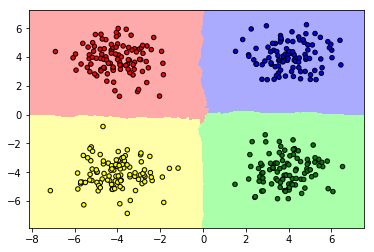

In [12]:
from sklearn import neighbors
from display import display_classifier

kNN = neighbors.KNeighborsClassifier(n_neighbours)
kNN.fit(data_gaussian,labels_gaussian)
display_classifier(kNN,data_gaussian,labels_gaussian)

Données Blobs + perceptron

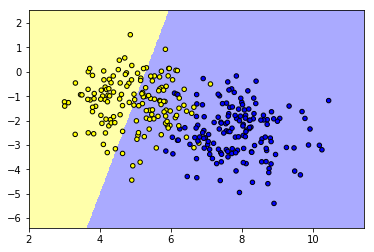

In [13]:
from sklearn import datasets,linear_model

data_blob,labels_blob = datasets.make_blobs(n_samples=300, n_features=2,
                                            centers=2, cluster_std=1.0,
                                            center_box=(-10.0, 10.0))                         
net = linear_model.Perceptron()
net.fit(data_blob,labels_blob)
                                    
display_classifier(net,data_blob,labels_blob)

# test sur données Iris

Données Iris : train et cross_validation

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

iris = datasets.load_iris()
iris_data = iris.data[:,:2]
iris_train, iris_test, iris_y_train, iris_y_test = train_test_split(iris_data,
                                                                iris.target,
                                                                test_size=0.2,
                                                                random_state=0)

Ici on peut voir le taux d'erreur en fonction de k

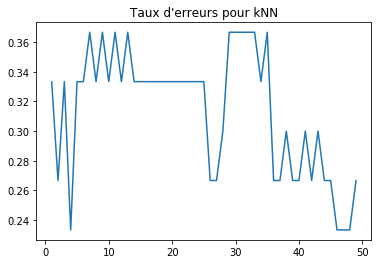

In [15]:
def kNN_test_errors(k,X_train,y_train,X_test,y_test):
    clf = neighbors.KNeighborsClassifier(k)
    clf.fit(X_train, y_train)
    return sum((clf.predict(X_test) == y_test) == False)/len(y_test)

def test_errors(K,X_train,y_train,X_test,y_test,disp=False):
    K = np.arange(1,K)
    err_kNN = [kNN_test_errors(k,X_train,y_train,
                             X_test,y_test) for k in K]
    if disp:
        plt.plot(K,err_kNN)
        plt.title("Taux d'erreurs pour kNN")
        plt.show()
    else:
        return err_kNN

test_errors(50,iris_train,iris_y_train,
                iris_test,iris_y_test,disp=True)

Classifier + test sur cross-validation data

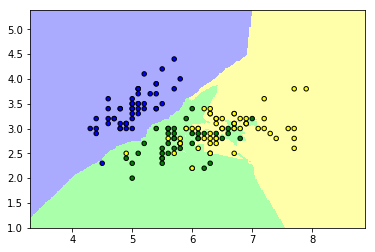

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.75      0.69      0.72        13
          2       0.43      0.50      0.46         6

avg / total       0.78      0.77      0.77        30



In [16]:
kNN = neighbors.KNeighborsClassifier(4)
kNN.fit(iris_train,iris_y_train)

display_classifier(kNN,iris_data,iris.target)

predicted = kNN.predict(iris_test)
print(classification_report(iris_y_test,predicted))